# Simple Linear Regression :

***Problem Statement :***
1) Delivery_time : Predict delivery time using sorting time 
2) Salary_hike : Build a prediction model for Salary_hike

------------------------------------------------------------

- Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
# Importing all usefull Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

# Q.1 Delivery_time
***Predict delivery time using sorting time***

In [3]:
# Loading given dataset
df = pd.read_csv("delivery_time.csv")

# This displays the first 5 rows of given dataset
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Selecting the columns from given dataset

df = df[['Delivery Time','Sorting Time']]

In [5]:
# Provides some information regarding the columns in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# Checking the basic stat behind the dataset used 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [74]:
# Checking for null values present in given dataset

df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

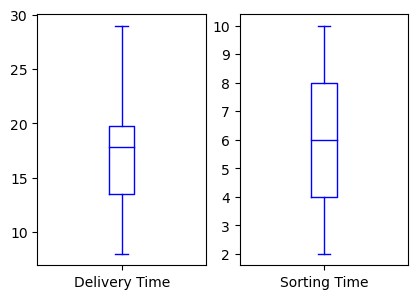

In [7]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots

df.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

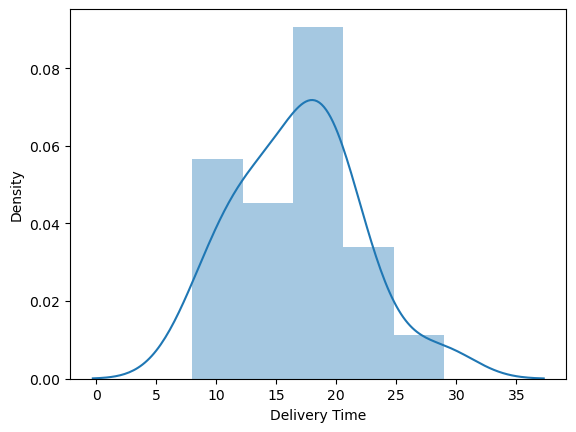

In [75]:
# Distribution of "Delivery Time" column

sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

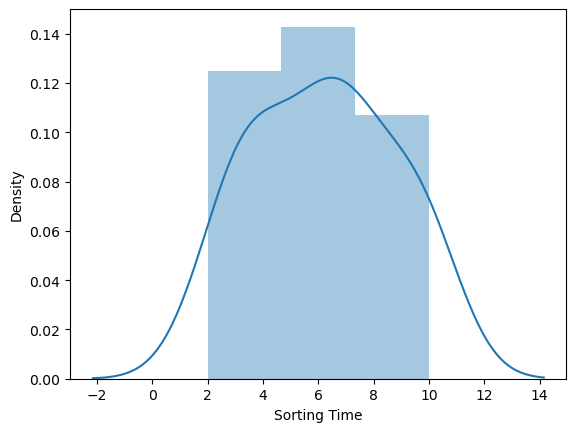

In [76]:
# Distribution of "Sorting Time" column

sns.distplot(df['Sorting Time'])

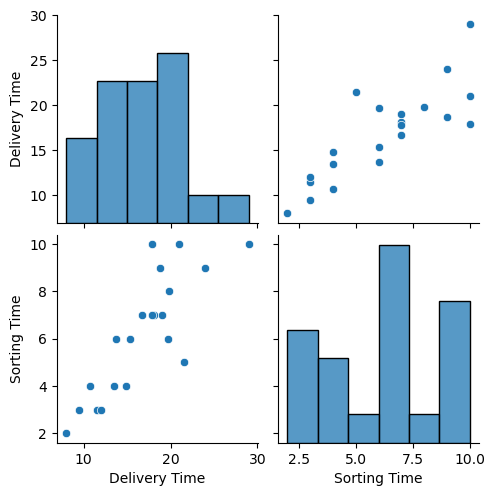

In [77]:
# Pairplot

sns.pairplot(df)

In [78]:
# Correlation analysis between these columns

df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

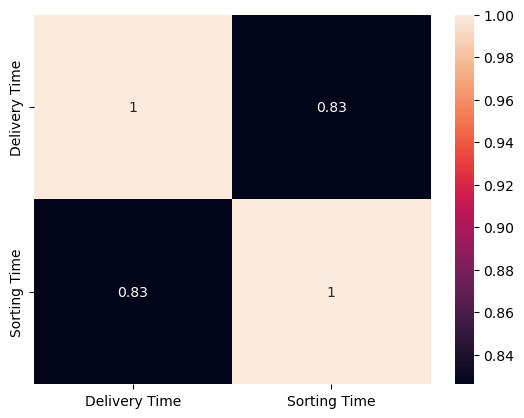

In [79]:
# Visualizing the correlation by using heatmap

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

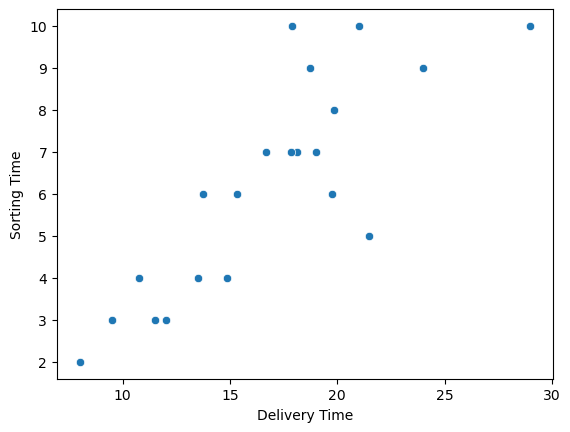

In [80]:
# Scatter plot

sns.scatterplot(df['Delivery Time'],df['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

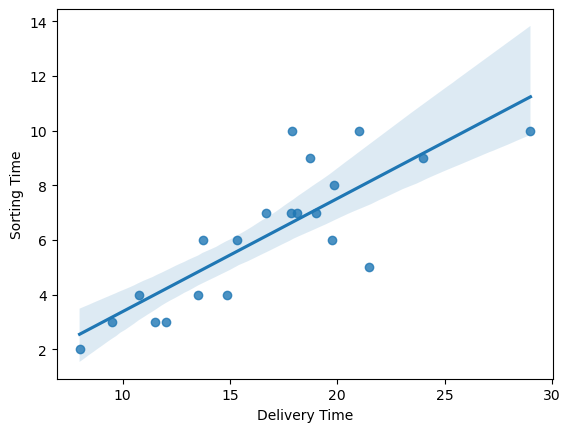

In [81]:
# Regression plot

sns.regplot(df['Delivery Time'],df['Sorting Time'])

# Model Building :

In [8]:
# Renaming the columns for model building

df = df.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
model = smf.ols('Delivery_Time~Sorting_Time', data=df).fit()

In [10]:
model

In [11]:
# Model Parameters

model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [12]:
# T-value & P-value

print(f"The T-value is :\n{model.tvalues}\nP-value is :\n{model.pvalues}")

The T-value is :
Intercept       3.823349
Sorting_Time    6.387447
dtype: float64
P-value is :
Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [13]:
# R2 Value & Adjusted R2 Value

print('R2 Value :',model.rsquared)
print('Adjusted R2 Value :',model.rsquared_adj)

R2 Value : 0.6822714748417231
Adjusted R2 Value : 0.6655489208860244


In [14]:
# Summary of the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        18:07:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Performing log transformation :***

In [15]:
model_1 = smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)", data=df).fit()

model_1

In [16]:
# Model parameters

model_1.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [17]:
# T-value & P-value

print(f"The T-value is :\n{model_1.tvalues}\nP-value is :\n{model_1.pvalues}")

The T-value is :
Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64
P-value is :
Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64


In [18]:
# R2 Value & Adjusted R2 Value

print('R2 Value :',model_1.rsquared)
print('Adjusted R2 Value :',model_1.rsquared_adj)

R2 Value : 0.77216134926874
Adjusted R2 Value : 0.7601698413355158


In [20]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 02 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           18:14:21   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Performing square root transformation :***

In [22]:
model_2 = smf.ols("np.square(Delivery_Time)~np.square(Sorting_Time)", data=df).fit()

model_2

In [23]:
# Model parameters

model_2.params

Intercept                  114.154847
np.square(Sorting_Time)      4.323874
dtype: float64

In [24]:
# T-value & P-value

print(f"The T-value is :\n{model_2.tvalues}\nP-value is :\n{model_2.pvalues}")

The T-value is :
Intercept                  2.523810
np.square(Sorting_Time)    5.209376
dtype: float64
P-value is :
Intercept                  0.020675
np.square(Sorting_Time)    0.000050
dtype: float64


In [26]:
# R2 Value & Adjusted R2 Value

print('R2 Value :',model_2.rsquared)
print('Adjusted R2 Value :',model_2.rsquared_adj)

R2 Value : 0.5881883446986838
Adjusted R2 Value : 0.5665140470512461


In [27]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(Delivery_Time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Thu, 02 Feb 2023   Prob (F-statistic):           4.99e-05
Time:                              18:20:06   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(Sorting_Time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction for delivery time

In [91]:
# Creating New data for prediction for delivery time
newdata1 = pd.Series([10,12,8,15,19,5])

# Creating a Dataframe
data1 = pd.DataFrame(newdata1, columns=['Sorting_Time'])
data1

,Sorting_Time
0,10
1,12
2,8
3,15
4,19
5,5


In [92]:
# Prediction for new data

model.predict(data1)

0    23.072933
1    26.370973
2    19.774893
3    31.318032
4    37.914112
5    14.827833
dtype: float64

# Q.2 Salary_hike
***Build a prediction model for Salary_hike***

In [28]:
# Loading given dataset
df1 = pd.read_csv('Salary_Data.csv')

# Showing the first 5 rows of the given dataset
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
# Provides some information regarding the columns in the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
# Describing the given dataset

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


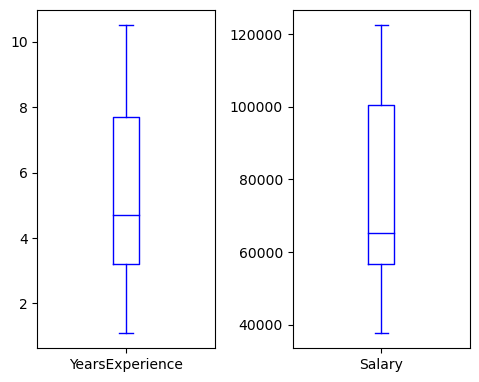

In [32]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots

df1.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

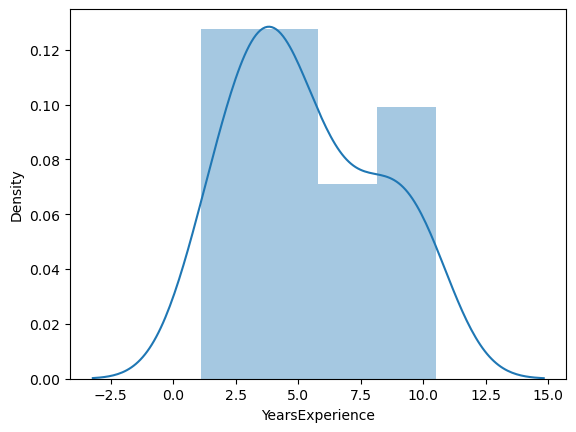

In [45]:
# Distribution of the "YearsExperience" column

sns.distplot(df1['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

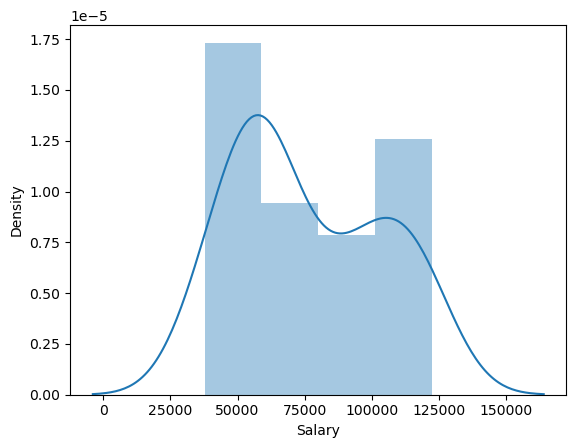

In [46]:
# Distribution of the "Salary" column

sns.distplot(df1['Salary'])

In [47]:
# Correlation between these columns

df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

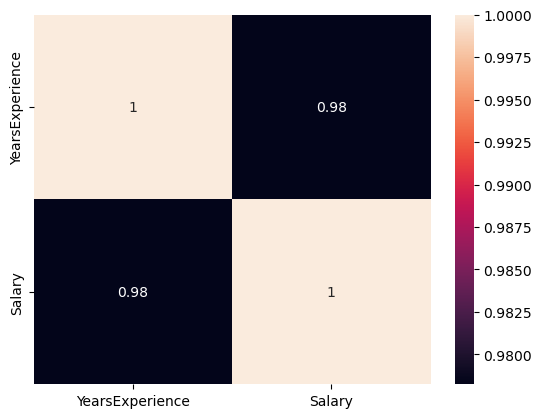

In [48]:
# Visualizing the correlation by using heatmap

sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

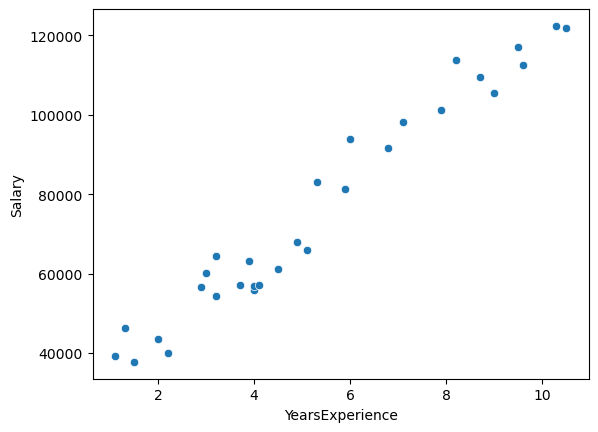

In [49]:
# Checking the trend of the given dataset

sns.scatterplot(df1['YearsExperience'],df1['Salary'])

In [33]:
# Checking unique values from "YearsExperience" column

df1['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

# Model Building :

In [48]:
model = smf.ols('Salary~YearsExperience', data=df1).fit()

model

In [38]:
# Model parameters

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

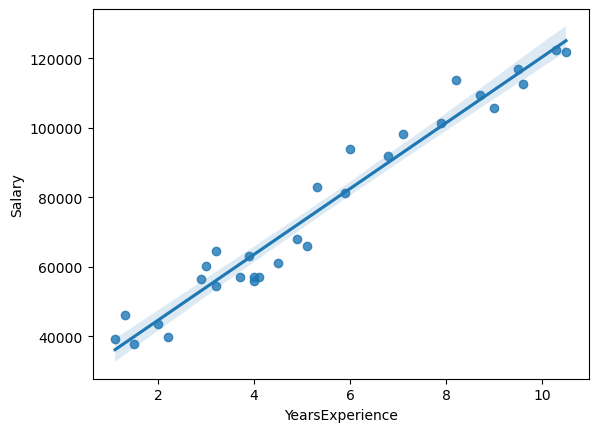

In [44]:
#Regretion plot

sns.regplot(x=df1['YearsExperience'],y=df1['Salary'], data=df1)

In [36]:
#Print values for t-value & p-value

print(f"The t-value is\n {model.tvalues}\np-value is\n {model.pvalues}")

The t-value is
 Intercept    11.346940
y            24.950094
dtype: float64
p-value is
 Intercept    5.511950e-12
y            1.143068e-20
dtype: float64


In [62]:
# R-square & Adjusted R-square values

print('R-square value :', model.rsquared)
print('Adjusted R-square value :', model.rsquared_adj)

R-square value : 0.9569566641435086
Adjusted R-square value : 0.9554194021486339


# Prediction for new data :

In [45]:
# Creating New Data for prediction for salary hike
newdata = pd.Series([5,9,15,12,7,20])

# Creating a Dataframe
data = pd.DataFrame(newdata, columns=['YearsExperience'])
data

,YearsExperience
0,5
1,9
2,15
3,12
4,7
5,20


In [46]:
# Prediction for salary hike by new data

model.predict(data)

0     73042.011806
1    110841.861092
2    167541.635020
3    139191.748056
4     91941.936449
5    214791.446628
dtype: float64